# Generative Models
***

**ITMO University, Autumn 2022, MSc course**


## Assignment 2

***


*Authored by Arip Asadulaev & Manh Lab*

*Adapted by Alexander Panfilov*

***


Let's continue our dive into the classical generative models! Today's goal is to implement Conditional GAN for the MNIST dataset. There will be no particular instructions how to do it (just a few checkpoints) - feel free to rewrite this skeleton or reuse your code from the previous assignment.

Good luck!

## 1. Conditional GAN
*Source: <a href="https://arxiv.org/pdf/1411.1784.pdf" target="_blank">Mirza, Mehdi, and Simon Osindero. "Conditional generative adversarial nets." arXiv preprint arXiv:1411.1784 (2014)</a>.*

### Imports

In [1]:
import sys
sys.path.append('..')
from importlib import reload

import src.c_gan
reload(src.c_gan)
from src.c_gan import CGenerator, CDiscriminator
import src.c_gan_trainer
reload(src.c_gan_trainer)
from src.c_gan_trainer import CGanTrainer
import src.image_utils
reload(src.image_utils)
from src.image_utils import ImageUtils

import os

import torch
from torch import nn
from torch import optim
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

In [2]:
lr = 0.0002

noize_size = 64  
image_size = 28
hidden_size = 256
number_class = 10

batch_size = 100
epochs = 300

device = 'cuda' if torch.cuda.is_available() else 'cpu'

data_dir = 'data'
generated_images_dir = 'c_gan_mnist_images'

In [3]:
mnist_dataset = ImageUtils.read_mnist_dataset(data_dir)

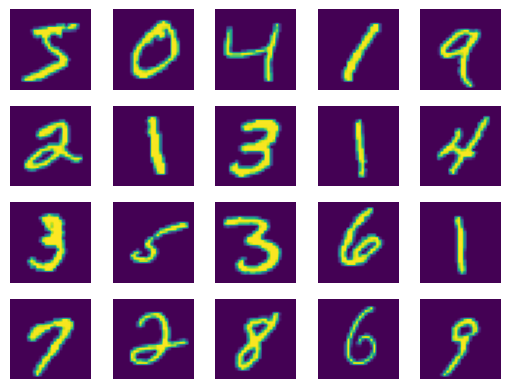

In [4]:
for i in range(20):
    image, label = mnist_dataset[i]
    ax = plt.subplot(4, 5, i + 1)
    ax.imshow(ToPILImage()(image))
    ax.axis('off')

In [5]:
generator = CGenerator(noize_size, hidden_size, image_size, number_class)
discriminator = CDiscriminator(image_size, hidden_size, number_class)

In [6]:
y = generator(torch.randn(2, noize_size), torch.IntTensor([1, 4]))
discriminator(y, torch.IntTensor([1, 4]))

tensor([[0.4789],
        [0.4657]], grad_fn=<SigmoidBackward0>)

In [7]:
loss_function = nn.BCELoss()

g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [ ]:
gan_trainer = CGanTrainer(device)
gan_trainer.train(
    mnist_dataset, generator, discriminator, g_optimizer, d_optimizer, loss_function, number_class,
    batch_size, (noize_size,), (image_size ** 2,), (1, image_size, image_size), 5, generated_images_dir)

Epoch [0/5], Step [100/600], d_loss: 0.6811, g_loss: 2.4464, D(x): 0.82, D(G(z)): 0.26
Epoch [0/5], Step [200/600], d_loss: 0.5332, g_loss: 2.5317, D(x): 0.88, D(G(z)): 0.28
Epoch [0/5], Step [300/600], d_loss: 0.3738, g_loss: 2.6144, D(x): 0.85, D(G(z)): 0.12
Epoch [0/5], Step [400/600], d_loss: 0.2641, g_loss: 3.4463, D(x): 0.94, D(G(z)): 0.15
Epoch [0/5], Step [500/600], d_loss: 0.2194, g_loss: 5.5637, D(x): 0.92, D(G(z)): 0.03
Epoch [0/5], Step [600/600], d_loss: 0.2851, g_loss: 3.1028, D(x): 0.88, D(G(z)): 0.08
Saving c_gan_mnist_images/fake_images_1.png
Epoch [1/5], Step [100/600], d_loss: 0.1282, g_loss: 4.0177, D(x): 0.98, D(G(z)): 0.08
Epoch [1/5], Step [200/600], d_loss: 0.1482, g_loss: 3.9958, D(x): 0.93, D(G(z)): 0.03
Epoch [1/5], Step [300/600], d_loss: 0.1445, g_loss: 4.5441, D(x): 0.95, D(G(z)): 0.04
Epoch [1/5], Step [400/600], d_loss: 0.0373, g_loss: 5.7590, D(x): 0.98, D(G(z)): 0.01
Epoch [1/5], Step [500/600], d_loss: 0.2157, g_loss: 4.7455, D(x): 0.94, D(G(z)): 0.04

### Show your conditional generation results for every class